In [1]:
%load_ext autoreload
%autoreload 2

Import dependencies packages of Python

In [2]:
import modules.eda as Detective
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Đọc dữ liệu từ project 1.

In [7]:
reviews = pd.read_csv("./data/normalize_reviews.csv", encoding="utf-8-sig").fillna("")

In [8]:
reviews.head()

,raw_comment,label,normalized_comment,emoji
0,,0,,
1,Shop giao nhầm size. Áo from khá rộng nh...,0,giao nhầm size áo from khá rộng nhưng k...,
2,Áo form ổn. Khá xinh. Nhưng mà giao hàn...,0,áo form ổn khá xinh nhưng mà giao hàng ...,
3,Áo đẹp\nNhưng tay áo 1 bên trắng 1 bên...,0,áo đẹp nhưng tay áo bên trắng bên vàn...,
4,"Áo 2 lớp nhưng mỏng, có nhiều chỉ thu...",0,áo lớp nhưng mỏng có nhiều chỉ thừa...,


Bây giờ ta sẽ tạo ra hai feature có tên là:
* `length`: là chiều dài của feature `normalize_comment`.
* `no_words`: là số từ của feature `normalize_comment`.  

In [9]:
reviews['length'] = reviews['normalized_comment'].str.len()
reviews['no_words'] = reviews['normalized_comment'].str.split(" ").agg([len])

In [10]:
reviews

,raw_comment,label,normalized_comment,emoji,length,no_words
0,,0,,,0,1
1,Shop giao nhầm size. Áo from khá rộng nh...,0,giao nhầm size áo from khá rộng nhưng k...,,130,23
2,Áo form ổn. Khá xinh. Nhưng mà giao hàn...,0,áo form ổn khá xinh nhưng mà giao hàng ...,,100,19
3,Áo đẹp\nNhưng tay áo 1 bên trắng 1 bên...,0,áo đẹp nhưng tay áo bên trắng bên vàn...,,96,18
4,"Áo 2 lớp nhưng mỏng, có nhiều chỉ thu...",0,áo lớp nhưng mỏng có nhiều chỉ thừa...,,113,21
...,...,...,...,...,...,...
12171,"Quần rẻ, form đẹp, shop trả lời nhanh v...",1,quần rẻ form đẹp trả lời nhanh nhiệt ...,,177,31
12172,Mình đặt 1 lần rồi nhưng có vẻ đặt...,1,đặt lần nhưng có vẻ đặt lần thứ v...,,65,12
12173,"Chất liệu: mềm, mátMàu sắc: đúngĐú...",1,chất liệu mềm sắc mô tả giao nhanh s...,,126,22
12174,Chất liệu: Vải DùMàu sắc: đenĐúng vo...,1,chất liệu vải sắc mô tả phẩm tuyệ...,,133,23


Bây giờ chúng ta sẽ sắp xếp lại thứ tự của các feature trong `reviews`.

In [11]:
reviews = reviews[['raw_comment', 'normalized_comment', 'length', 'no_words', 'emoji', 'label']]

In [12]:
reviews.head()

,raw_comment,normalized_comment,length,no_words,emoji,label
0,,,0,1,,0
1,Shop giao nhầm size. Áo from khá rộng nh...,giao nhầm size áo from khá rộng nhưng k...,130,23,,0
2,Áo form ổn. Khá xinh. Nhưng mà giao hàn...,áo form ổn khá xinh nhưng mà giao hàng ...,100,19,,0
3,Áo đẹp\nNhưng tay áo 1 bên trắng 1 bên...,áo đẹp nhưng tay áo bên trắng bên vàn...,96,18,,0
4,"Áo 2 lớp nhưng mỏng, có nhiều chỉ thu...",áo lớp nhưng mỏng có nhiều chỉ thừa...,113,21,,0


Mặc dù ở project 1 chúng ta đã biết khá rõ ta đã làm mọi thử để ta có một dataset mà **cân bằng về số lượng observe ở các class**. Mặc dù vậy ta có thể trực quan hóa về số lượng các sample trong từng class của dataset này lên một biểu đồ nào đó. Vì ta chỉ có 2 class là **negative** và **positive** - nên pie chart sẽ là một biểu đồ lí tưởng để làm điều này.

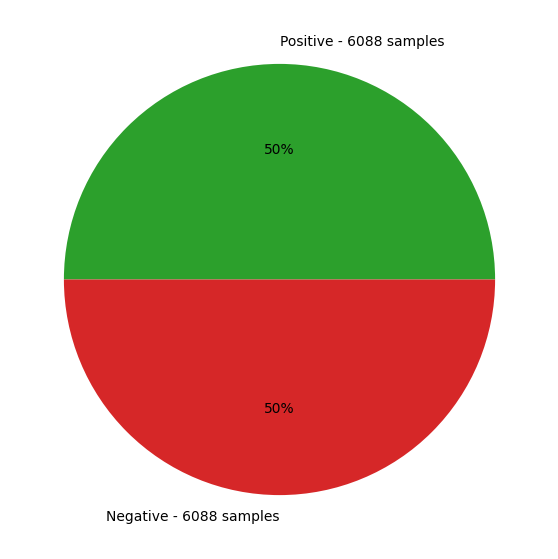

In [13]:
Detective.pieChart(reviews)

**Nhận xét**:
* Vì dữ liệu của ta ở project 1 ta đã làm nó có sự cân bằng giữa hai class, và với dataset này cũng chỉ có 2 class trong target variable nên ta chưa thấy được lợi ích của quá trình data visualization, nếu target variable của chúng ta có nhiều class hơn thì pie chart giúp ta thấy được class nào đang áp đảo các class nào hơn về mặt số lượng, tỉ lệ giữa các class - điều mà nếu chỉ nhìn bằng các con số ta đôi khi khó mường tượng và rất mơ hồ.

* Tiếp theo, chúng ta cũng cần đặt câu hỏi: "Liệu giữa negative và positive class, khách hàng của class nào có xu hướng sử dụng comment trong phần bình luận của họ hơn?".
* Vì ở đây, chúng ta đang **quan tâm về số lượng** nên bar chart là một biểu đồ đủ tốt để ta trực quan hóa được điều này.

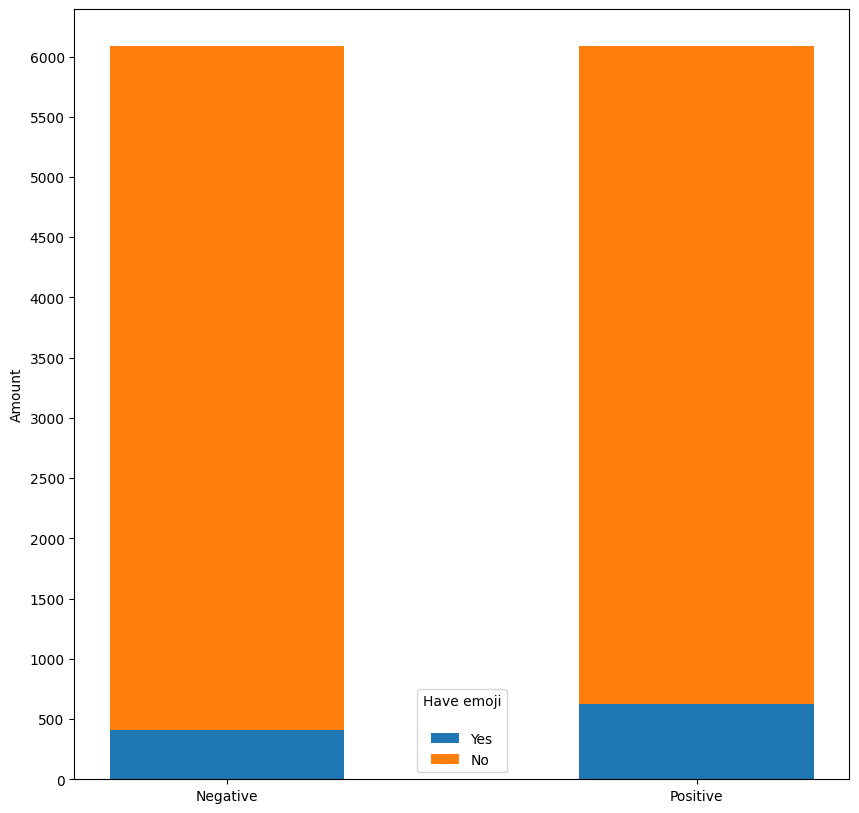

In [14]:
Detective.emojiClassBarplot(reviews)

> **Nhận xét**
> * Có thể thấy rằng số khách hàng thuộc nhóm positive có xu hướng sử dụng comment nhiều hơn trong comment của họ so với khách hàng nhóm negative, tuy nhiên khác biệt này cũng không quá lớn.
> * Ngoài ra, ta có thể thấy khách hàng trên shopee đa phần cũng sẽ không sử dụng emoji trong comment của mình cho lắm. Điển hình với khách hàng nhóm nagative, tỉ lệ khách hàng có dùng emoji trong comment của mình chỉ khoảng từ $(5, 7)$ phần trăm. Ở nhóm positive là khoảng $(10, 13)$ phần trăm.

Tiếp theo, ta có thể xem phân phối của feature `length` để xem giữa class **negative** và **positive** có điểm gì khác nhau. 

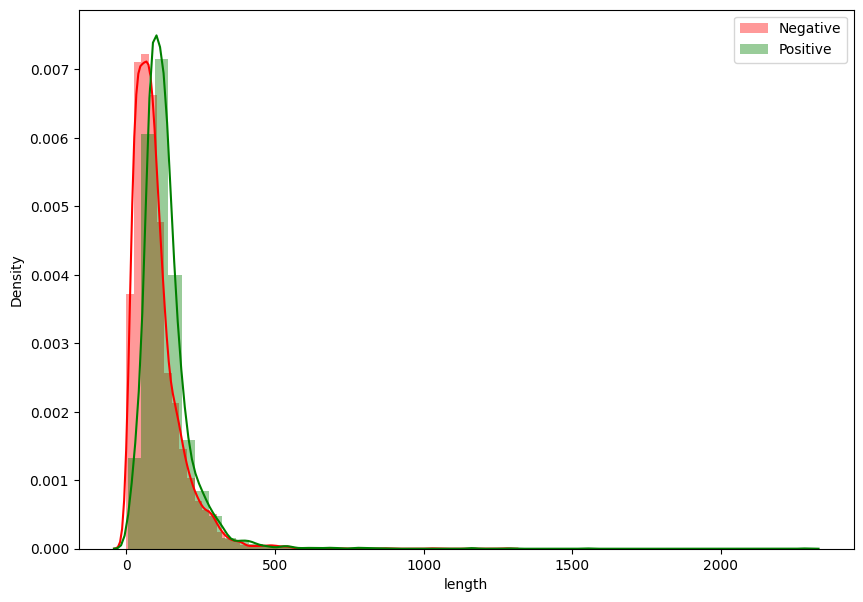

In [15]:
Detective.lengthDistplot(reviews)

> **Nhận xét**:
> * Các khách hàng thuộc nhóm negative thông thường có chiều dài comment nằm trong khoảng từ 25 đến 80.
> * Trong khi đó, các khách hàng nhóm positive thì thường có bình luận dài hơn so với nhóm negative, thường nằm trong khoảng từ 40 đến 130.
> * MỘt điều nữa là khách hàng nhóm positive không chỉ comment dài hơn mà còn có mật độ tập trung cao hơn.
> * Tuy nhiên vẫn có các comment mà có chiều dài chạm mốc hơn 300, liệu chúng có phải outlier do qua trình tiền xử lí ta làm không tốt không, bước dưới đây ta sẽ nhìn kĩ vào hơn các sample này.

Ở bước này, ta sẽ xem các comment mà có chiều dài lớn hơn 300, xem chúng có phải là outlier hay noise không.

In [17]:
cmt_gt_300 = reviews.loc[reviews[reviews['length'] > 300].index]['normalized_comment']

len(cmt_gt_300)

344

In [18]:
for cmt in cmt_gt_300[:10]:
    print(cmt, "\n")

tầm giá có nhiều sản phẩm khác tốt hơn hẳn hai bên túi siêu nông được nửa bàn tay trông hàng cúc co rúm chán dã man đầu tiên cho sau giặt lần phải vào rate vì phần in bay màu gần hết vải xù lông phí tiền các bạn cho chắc toàn học sinh không biết nhìn chất lượng áo 

giao nhanh đặt nhận được vải lớp không mỏng nhưng đặt size xl mà nhỏ như size l mình mặc ngắn lắm mua áo như ở khác size xl dài hơn size xl ở mà còn rẻ hơn mọi không nên mua size của không chuẩn mà còn đắt hơn những khác mua về mặc không được phí tiền 

phản hồi của người hỗ trợ khách hết mức có thể b nhắn tin cho từ lúc chưa bấm hoàn thành đơn báo b chọn trả hàng hoàn tiền qua lấy đơn bạn cố tình ấn vào nút nhận được hàng nên không thể hoàn trả đơn qua được sau vẫn đồng ý cho b hoàn hàng mặc dù quy định của là đơn 

> **Nhận xét**:
> * Có lẽ là do ta suy nghĩ quá nhiều, dù có đến hơn 200 bình luận có chiều dài hơn 300 nhưng những bình luận này mang lại cho ta nhiều thông tin hơn là các bình luận thuộc nhóm có mật độ cao mà ta đã làm bước trước.

Bước trước ta đã minh họa một distribution plot trên feature `length`, bước này ta có thể sử dụng histogram để biểu diễn frequency của feature `no_words` trong các comment, nghe có vẻ dư thừa vì số từ nhiều đồng nghĩa với việc câu sẽ dài ra. Nhưng với một dữ liệu mà ta chỉ mới tiếp xúc lần đầu, mọi thao tác xử lí trên nó đều có giá trị, biết đâu sẽ cho ta có được nhiều các nhìn hơn về dữ liệu hiện có.
Tuy nhiên, ta cũng cần lưu ý, vì câu của ta có chiều dài đa phần nằm trong khoảng từ 25 đến 130, nên ta cần phải chọn một **bin value** phù hợp, ở đây ta sẽ thử với bin 30.

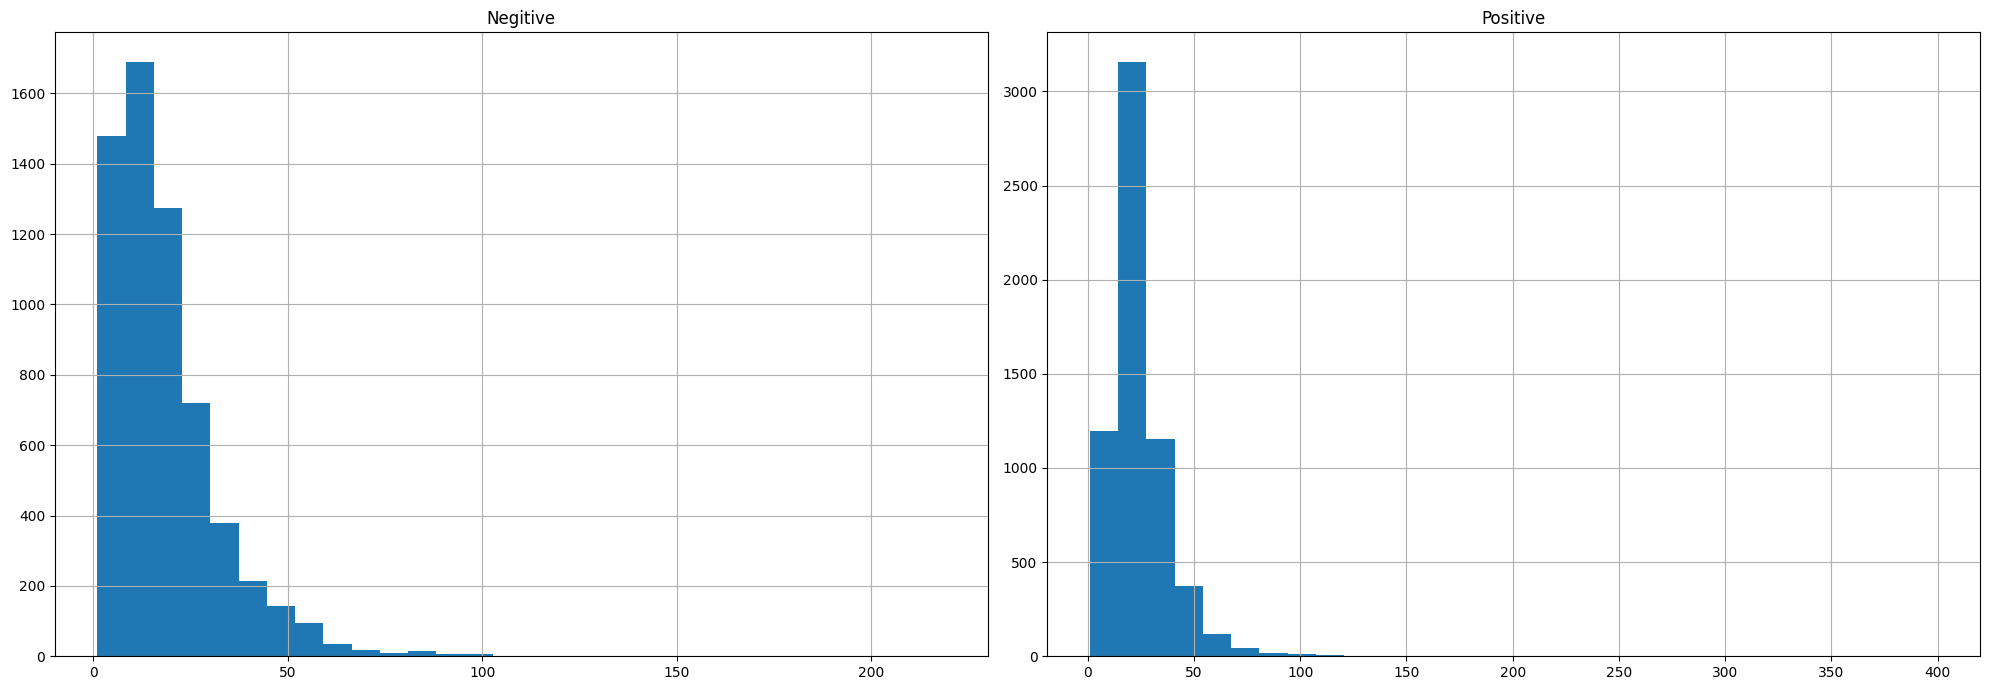

In [20]:
Detective.noWordsFrequency(reviews)

> **Nhận xét**:
> * Nhóm khách hàng negative thường dùng khoảng từ 5 đến 15 từ trong một bình luận, frequency là 600.
> * Nhóm khách hàng positive thường dùng khoảng 8 đến 18 từ trong một bình luận với frequency cao hơn là 800, đặc biệt họ thường dùng khoảng 15 từ để bình luận với frequency chạm mốc hơn 1400.
> * Nhìn chung, các từ tiếng việt phổ biến thường trong khoảng 4 kí tự, vậy chiều dài trung bình của một bình luận nếu ta tính một cách ước chừng là $4 * 10 + 9 = 49$. Khi ta xem lại distribution plot mà ta đã vẽ cho feature `length`, ta thấy được hai đường **KDE** cắt nhau lần đầu cũng tại `length` có giá trị đâu đó nằm loanh quanh 50.
> * Từ đây thì với tiếng việt, suy nghĩ của ta ban đầu là từ nhiều thì câu dài cũng có phần chính xác. Với các ngôn ngữ khác, điều này có thể không còn đúng nữa, trong tiếng việt từ dài nhất là **nghiêng** với 7 kí tự và ngắn nhất là **ba** với 2 kí tự, trong khi đó với các ngôn ngữ khác như tiếng anh có từ lên đến 45 kí tự là "**Pneumonoultramicroscopicsilicovolcanoconiosis**" chỉ dùng để chỉ một căn bệnh về phổi, ngoài ra ta cũng có thể tìm hiểu về độ dài trung bình của các từ trong các ngôn ngữ khác nhau ở đây [http://www.ravi.io/language-word-lengths](http://www.ravi.io/language-word-lengths).

Để thêm phần khẳng định cho tuyên bố trên, chúng ta có thể biểu diễn mối quan hệ giữa `length` và `no_words` có thực sự có mối quan hệ tuyến tính hay không thông qua biểu đồ **reg plot**.

<Figure size 1200x1000 with 0 Axes>

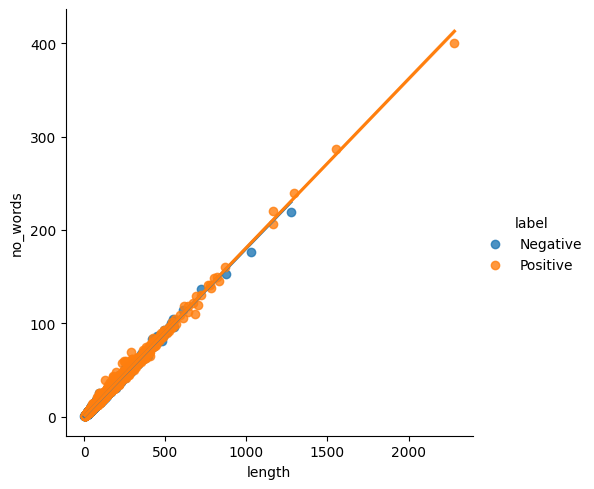

In [21]:
Detective.regplotLengthNoWords(reviews)

> **Nhận xét**:
> * Biểu đồ này là một bằng chứng mạnh mẽ cho một positive correlation giữa `length` và `no_words` với 2 regression line nằm hầu như tiệp vào nhau.
> * Và cũng như histogram plot trước đó, ta thấy có sự chồng chéo giữa các class trong feature `label`.

Ở các bước trên, ta dùng phương pháp visualization phân tích dữ liệu theo từng class positive và negative riêng biệt. Nếu ta muốn xem toàn bộ bức tranh, không phân biệt negative hay positive, thì ta có thể áp dụng các phương pháp của thống kê mô tả trên hai feature là `length` và `no_words` bằng hàm `describe()`.

In [22]:
reviews[['length', 'no_words']].describe()

,length,no_words
count,12176.000000,12176.000000
mean,116.541311,21.410069
std,84.473779,15.316316
min,0.000000,1.000000
25%,66.000000,12.000000
50%,101.000000,19.000000
75%,147.000000,27.000000
max,2283.000000,400.000000


Tuy nhiên, để mọi thứ rõ ràng, ta nên có một thứ gì đó để trực quan hóa mọi giá trị của thống kê mô tả. Và có một loại biều đồ mà có thể thực hiện được điều này là boxplot, nó giúp ta dễ dàng so sánh giữa các số liệu thống kê trên các trường dữ liệu.

> **Nhận xét**:
> * Ta thấy rằng bình luận có `length` ngắn nhất là 1, tôi cũng không biết từ tiếng việt nào có 1 kí tự nữa, dài nhất là 395, trung bình là khoảng 88. Mọi thứ đều hợp lí với biểu đồ distribution mà ta vẽ cho từng class riêng biệt.
> * Ở feature `no_words`, thì bình luận có nhiều từ nhất là 79 từ với trung bình là 16 từ cho một bình luận.
> * Ở đây, không cần trực quan hóa mà chỉ cần nhìn vào số liệu, ta rõ ràng thấy được cả `length` và `no_words` đều có phân phối lệch phải _(right-skewed)_. Tuy nhiên, bài toán của ta là sentiment analysis, ta quan tâm hơn về mặt ngữ nghĩa từ ngôn ngữ - cấu trúc câu hơn là số liệu thống kê. Giả sử đây là bài toán hồi quy, thì ta có thể áp dụng **log-transformation** để giảm độ lệch phải của dữ liệu.
> ![](./images/08.png)

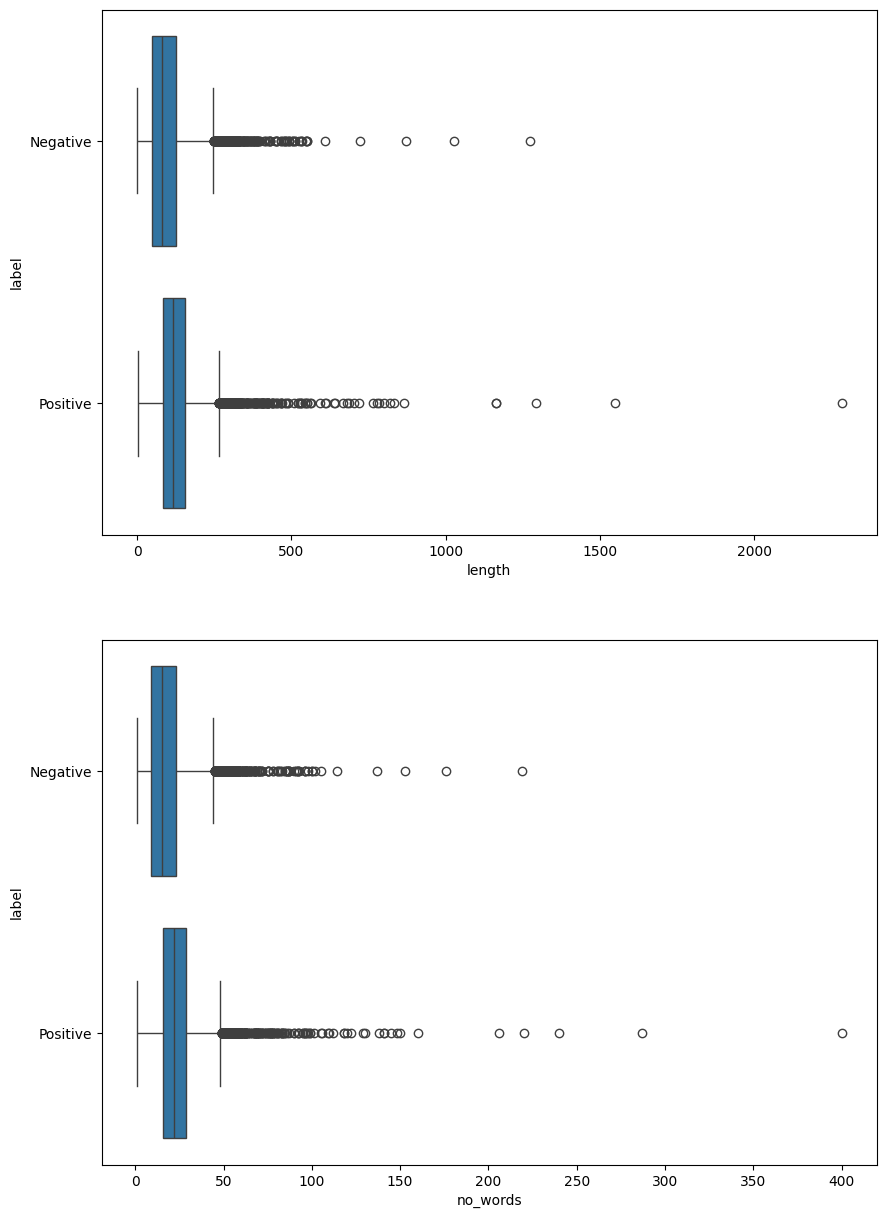

In [23]:
Detective.boxplotDescribeStatistics(reviews)

> **Nhận xét**:
> * Nếu ta chỉ nhìn vào các giá trị được đưa ra bởi hàm `describe()` thì có lẽ ta đã bị đánh lừa. Rõ ràng ở đây, ta thấy rằng phân phối của hai feature `length` và `no_words` trên nhóm khách hàng positive rất gần phần phối chuẩn (nếu như không tính phần outlier được boxplot thể hiện) vì giá trị mean của boxplot nằm giữa hộp vuông.
> * Còn với nhóm khách hàng nhóm negative, nó bị lệch phải nhưng không quá nhiều. Nếu đây là các feature mà ta quan tâm trong lúc model training, ta có thể áp dụng log-normalization lên chúng trước sau đó training sau.

Gần đây, tôi được một bạn trên Twitter quảng cáo về một package là **pandas-profiling** dùng để thống kê mô tả và trực quan hóa dữ liệu nhanh trên pandas dataframe, cài đặt và dùng như sau:
  ```shell
  pip install pandas-profiling
  pip install ipywidgets
  ```

In [24]:
from ydata_profiling import ProfileReport

In [25]:
profile = ProfileReport(reviews)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> **Nhận xét**:
> * Pandas-profiling cung cấp cho ta tất cả các số liệu về thống kê mô tả cơ bản mà một dataset bất kì nào cũng cần, thậm chí nó còn làm tốt hơn tôi.
> * Bước tiếp theo, ta sẽ tìm hiểu về mối quan hệ giữa biến phân loại **label** với lần lượt hai biến liên tục là **length** và **no_words**. 

Tiếp theo, ta sẽ kiểm chứng mối quan hệ giữa biến phân loại `label` và biến liên tục `length` và `no_words` với **null hypothesis** là giữa các class trong `label` chịu tác động từ `length` hoặc `no_words` là như sau. Ta sẽ áp dụng ANOVA one-way để kiểm tra điều này.

In [26]:
Detective.onewayANOVA(reviews, 'length')

               df        sum_sq       mean_sq           F         PR(>F)
label         1.0  3.248297e+06  3.248297e+06  472.852149  6.875278e-103
Residual  12174.0  8.363030e+07  6.869583e+03         NaN            NaN


> **Nhận xét**:
> * Vì giá trị **p-value** (`PR(>F)`) nhỏ hơn 5% tức ta phải bác bỏ **null hypothesis**.
> * Tuy nhiên, ta chỉ biết là `label` chịu tác động không đều giữa các class bởi `length`, nhưng ta không biết được class nào sẽ chịu tác động lớn hơn hoặc kém hơn so với các class còn lại, buớc tiếp theo ta sẽ áp dụng **post-hoc testing** để kiểm chứng điều này.
> * Ta sẽ áp dụng **t-test** để kiểm chứng điều này, tuy nhiên do số class trong `label` chỉ có hai, làm điều này là hơi thừa thải, và các sơ đồ boxplot ở phía trên cũng đã cho ta thấy được giữa các class của `label` là có sự khác biệt đáng kể về giá trị trung bình, tức có class chịu tác động lớn hơn bởi `length`, người ta thường áp dụng **post-hoc testing** khi có từ 3 class trong categorical variable trở lên, nhưng ta cứ áp dụng thử xem mọi thứ phía trước ta làm cho đến bây giờ bao gồm trực quan hóa, thống kê mô tả có đúng trên hypothesis testing không.

In [27]:
Detective.onewayANOVA(reviews, 'length', True)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Positive-Negative,32.666721,1.502252,21.745164,6.875278e-103,29.722068,35.611375,6.875278e-103,True


> **Nhận xét**:
> * Rõ ràng, ở trường `reject-hs` với giá trị **True** tức là có sự khác biệt về giá trị trung bình đáng kể bởi `length` lên các class trong `label`.
> * Tiếp theo, ta cũng có thể áp dụng tương tự cho cặp feature `label` và `no_words` mặc dù ta đã biết trước là cũng cho ra kết luận tương tự như cặp `label` và `length` thôi. Vì ở bước trực quan ta biết được rằng càng nhiều từ thì bình luận càng dài.

In [28]:
Detective.onewayANOVA(reviews, 'no_words')

               df        sum_sq        mean_sq          F         PR(>F)
label         1.0  1.136348e+05  113634.757638  504.42778  1.705595e-109
Residual  12174.0  2.742493e+06     225.274583        NaN            NaN


In [29]:
Detective.onewayANOVA(reviews, 'no_words', True)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Positive-Negative,6.109888,0.272041,22.45947,1.705595e-109,5.576645,6.643131,1.705595e-109,True


> **Nhận xét**:
> * Như nhận xét ở bên trên, mọi kết luận của cặp `label` và `no_words` đều tương tự như cặp `label` và `length`.

### Kết luận:
* Mặc dù những gì ta làm trên các feature `length` và `no_words` mang đến cho ta có cái nhìn đa chiều và nhiều điểm thú vị trong dataset, nhưng thực chất chúng chỉ dừng lại ở mức tìm hiểu, ta khó có thể (thậm chí là không) sử dụng chúng trong việc training model, vì bài toán của chúng ta là sentiment analysis, nó phụ thuộc vào ngữ nghĩa của từ và cấu trúc ngữ pháp. 
* Dù rằng ta nói là khó có thể sử dụng hai feature là `length` và `no_words` vào quá trình training model, nhưng những bước ta làm phía trên cũng góp phần giúp ta đánh giá được dữ liệu của chúng ta đã sạch chưa, còn outlier hoặc noise sample không, điển hình là có bình luận chỉ dài 1 kí tự và trong tiếng việt ta cũng chưa biết có từ nào là 1 kí tự cả - rất có thể đây là từ viết tắt mà ta chưa biết, ta có thể bổ sung nó vào bước data pre-processing.
* Tài liệu tham khảo:
  * [https://www.investopedia.com/terms/t/t-test.asp](https://www.investopedia.com/terms/t/t-test.asp)
  * [https://blog.minitab.com/en/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005](https://blog.minitab.com/en/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005)
  * [https://www.scribbr.com/statistics/one-way-anova/#:~:text=In%20ANOVA%2C%20the%20null%20hypothesis,no%20difference%20among%20group%20means.&text=Significant%20differences%20among%20group%20means,(the%20variance%20left%20over).](https://www.scribbr.com/statistics/one-way-anova/#:~:text=In%20ANOVA%2C%20the%20null%20hypothesis,no%20difference%20among%20group%20means.&text=Significant%20differences%20among%20group%20means,(the%20variance%20left%20over).)
  * [https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)
  * [https://www.pythonfordatascience.org/anova-python/](https://www.pythonfordatascience.org/anova-python/)

## Công việc tiếp theo:
* Ta đã làm những việc cơ bản ban đầu cần có. Phần sau ta sẽ tập trung vào việc tiềm hiểu chi tiết hơn về các bình luận bằng cách trực quan các từ lên, đếm tần suất xuất hiện của từ, xem các từ nào giao nhau giữa nhóm positive và negative, tìm hiểu xem có cần bổ sung thêm cho stopword hay tập các từ viết tắt hay không,...